In [ ]:
#Importing necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/mentalStress.zip

Archive:  /content/gdrive/MyDrive/mentalStress.zip
  inflating: hrv dataset/data/final/test.csv  
  inflating: hrv dataset/data/final/train.csv  
  inflating: hrv dataset/data/raw/labels/hrv stress labels.xlsx  
  inflating: hrv dataset/data/raw/rri/p1.txt  
  inflating: hrv dataset/data/raw/rri/p10.txt  
  inflating: hrv dataset/data/raw/rri/p12.txt  
  inflating: hrv dataset/data/raw/rri/p13.txt  
  inflating: hrv dataset/data/raw/rri/p14.txt  
  inflating: hrv dataset/data/raw/rri/p15.txt  
  inflating: hrv dataset/data/raw/rri/p16.txt  
  inflating: hrv dataset/data/raw/rri/p17.txt  
  inflating: hrv dataset/data/raw/rri/p18.txt  
  inflating: hrv dataset/data/raw/rri/p19.txt  
  inflating: hrv dataset/data/raw/rri/p2.txt  
  inflating: hrv dataset/data/raw/rri/p20.txt  
  inflating: hrv dataset/data/raw/rri/p21.txt  
  inflating: hrv dataset/data/raw/rri/p22.txt  
  inflating: hrv dataset/data/raw/rri/p23.txt  
  inflating: hrv dataset/data/raw/rri/p24.txt  
  inflating: hrv datas

In [ ]:
#Importing Dataset
train = pd.read_csv("/content/hrv dataset/hrv dataset/data/final/train.csv")
test = pd.read_csv("/content/hrv dataset/hrv dataset/data/final/test.csv")


In [ ]:
train

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369284,721.396910,721.533965,36.377559,9.609941,9.609936,3.785409,83.384647,0.933333,0.000000,6.797519,...,38.227175,5.886975,10.880317,649.351702,8.190908,0.122087,2.096850,1.314910,2,no stress
369285,984.266492,978.622945,74.918433,13.762274,13.761705,5.443754,61.314243,6.333333,0.200000,9.734243,...,2.573834,0.112964,0.357547,2278.456746,278.683532,0.003588,2.131264,1.175975,2,no stress
369286,1025.499743,1024.968400,95.309200,23.051254,23.050395,4.134664,59.028594,30.400000,2.066667,16.304530,...,4.287216,0.098983,0.180070,4331.259564,554.340761,0.001804,2.215643,1.140232,2,no stress
369287,798.123167,803.559610,78.449897,16.736686,16.736657,4.687302,75.978628,10.000000,1.466667,11.838553,...,46.636158,1.591647,3.522995,2930.056129,27.384942,0.036516,2.091628,1.181937,2,no stress


In [ ]:
def fix_stress_labels(rj='',label_column='condition'):
    rj['condition'] = np.where(rj['condition']=='no stress', 0, 1)
    print(rj["condition"].unique())
    return rj


In [ ]:
train= fix_stress_labels(rj=test)
Y = train['condition']


[1]


In [ ]:
train["condition"].value_counts()

1    41033
Name: condition, dtype: int64

In [ ]:
train

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,721.901897,727.267280,74.722315,12.361264,12.361069,6.044877,84.121868,4.933333,0.000000,8.743513,...,66.617057,3.921868,9.760289,1698.605390,9.245599,0.108160,2.097342,1.243696,2,1
1,843.538633,844.407930,58.499429,19.298880,19.298795,3.031234,71.478642,21.000000,0.200000,13.650863,...,26.500086,1.123416,1.663151,2358.884694,59.126832,0.016913,2.217275,1.250056,2,1
2,958.523868,966.671125,132.849110,21.342715,21.342653,6.224565,63.874293,24.133333,1.800000,15.096571,...,16.024935,0.370208,0.766416,4328.633724,129.477524,0.007723,2.217136,1.144943,2,1
3,824.838669,842.485905,117.822094,11.771814,11.771248,10.008830,74.330531,4.733333,0.533333,8.326307,...,17.581470,0.615932,3.358652,2854.449091,28.773854,0.034754,2.106863,1.142355,2,1
4,756.707933,747.941620,143.968457,13.357748,13.356388,10.777899,82.092049,5.933333,0.666667,9.447545,...,35.199054,0.662879,6.292253,5310.027472,14.892559,0.067148,1.912191,1.128098,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41028,1118.406543,1117.857050,113.955632,18.592177,18.592071,6.129225,54.234182,18.800000,0.266667,13.150967,...,0.347514,0.006813,0.035830,5100.718213,2789.962965,0.000358,2.183460,1.082927,2,1
41029,855.991173,765.221410,296.763366,20.623727,20.610745,14.389415,76.416971,15.733333,3.533333,14.578861,...,118.014128,1.383097,8.622919,8532.599635,10.597001,0.094366,1.695327,1.154370,2,1
41030,689.388662,663.192770,133.815714,21.699038,21.696138,6.166896,90.254005,13.933333,4.000000,15.346606,...,216.200973,3.559302,10.160405,6074.251632,8.842128,0.113095,2.078000,1.214869,2,1
41031,761.421571,761.064590,60.792671,11.280586,11.280573,5.389141,79.313782,2.733333,0.266667,7.979232,...,41.797177,3.124367,6.905613,1337.780773,13.480973,0.074179,2.191379,1.234546,2,1


In [ ]:
#Splitting X_train and Y_train
x_train=train.iloc[:,0:35]

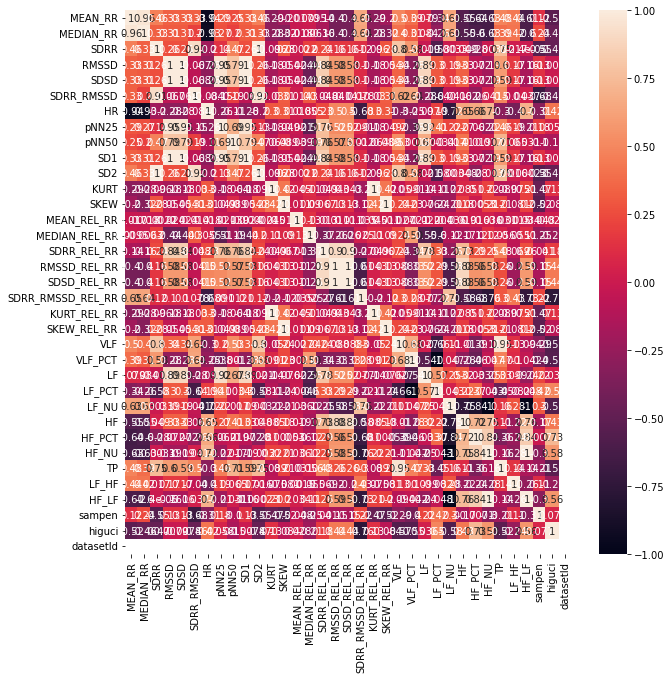

In [ ]:
f,ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(train.corr(), annot=True)


In [ ]:
x_train

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369284,721.396910,721.533965,36.377559,9.609941,9.609936,3.785409,83.384647,0.933333,0.000000,6.797519,...,89.119683,38.227175,5.886975,10.880317,649.351702,8.190908,0.122087,2.096850,1.314910,2
369285,984.266492,978.622945,74.918433,13.762274,13.761705,5.443754,61.314243,6.333333,0.200000,9.734243,...,99.642453,2.573834,0.112964,0.357547,2278.456746,278.683532,0.003588,2.131264,1.175975,2
369286,1025.499743,1024.968400,95.309200,23.051254,23.050395,4.134664,59.028594,30.400000,2.066667,16.304530,...,99.819930,4.287216,0.098983,0.180070,4331.259564,554.340761,0.001804,2.215643,1.140232,2
369287,798.123167,803.559610,78.449897,16.736686,16.736657,4.687302,75.978628,10.000000,1.466667,11.838553,...,96.477005,46.636158,1.591647,3.522995,2930.056129,27.384942,0.036516,2.091628,1.181937,2


In [ ]:
y_train = train['condition']

In [ ]:
y_train

0            no stress
1         interruption
2         interruption
3            no stress
4            no stress
              ...     
369284       no stress
369285       no stress
369286       no stress
369287       no stress
369288       no stress
Name: condition, Length: 369289, dtype: object

In [ ]:
test

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,721.901897,727.267280,74.722315,12.361264,12.361069,6.044877,84.121868,4.933333,0.000000,8.743513,...,66.617057,3.921868,9.760289,1698.605390,9.245599,0.108160,2.097342,1.243696,2,no stress
1,843.538633,844.407930,58.499429,19.298880,19.298795,3.031234,71.478642,21.000000,0.200000,13.650863,...,26.500086,1.123416,1.663151,2358.884694,59.126832,0.016913,2.217275,1.250056,2,time pressure
2,958.523868,966.671125,132.849110,21.342715,21.342653,6.224565,63.874293,24.133333,1.800000,15.096571,...,16.024935,0.370208,0.766416,4328.633724,129.477524,0.007723,2.217136,1.144943,2,no stress
3,824.838669,842.485905,117.822094,11.771814,11.771248,10.008830,74.330531,4.733333,0.533333,8.326307,...,17.581470,0.615932,3.358652,2854.449091,28.773854,0.034754,2.106863,1.142355,2,no stress
4,756.707933,747.941620,143.968457,13.357748,13.356388,10.777899,82.092049,5.933333,0.666667,9.447545,...,35.199054,0.662879,6.292253,5310.027472,14.892559,0.067148,1.912191,1.128098,2,interruption
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41028,1118.406543,1117.857050,113.955632,18.592177,18.592071,6.129225,54.234182,18.800000,0.266667,13.150967,...,0.347514,0.006813,0.035830,5100.718213,2789.962965,0.000358,2.183460,1.082927,2,time pressure
41029,855.991173,765.221410,296.763366,20.623727,20.610745,14.389415,76.416971,15.733333,3.533333,14.578861,...,118.014128,1.383097,8.622919,8532.599635,10.597001,0.094366,1.695327,1.154370,2,interruption
41030,689.388662,663.192770,133.815714,21.699038,21.696138,6.166896,90.254005,13.933333,4.000000,15.346606,...,216.200973,3.559302,10.160405,6074.251632,8.842128,0.113095,2.078000,1.214869,2,no stress
41031,761.421571,761.064590,60.792671,11.280586,11.280573,5.389141,79.313782,2.733333,0.266667,7.979232,...,41.797177,3.124367,6.905613,1337.780773,13.480973,0.074179,2.191379,1.234546,2,no stress


In [ ]:
corr = test.corr()

In [ ]:
corr

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId
MEAN_RR,1.000000,0.960037,0.460888,0.333483,0.333385,0.329477,-0.945474,0.287373,0.246520,0.333385,...,0.637154,-0.554767,-0.646136,-0.637154,0.477455,0.432048,-0.611687,0.118401,-0.515176,NaN
MEDIAN_RR,0.960037,1.000000,0.329755,0.310089,0.310049,0.198618,-0.929445,0.271983,0.198841,0.310049,...,0.631427,-0.552826,-0.598938,-0.631427,0.384690,0.418981,-0.606254,0.233685,-0.459963,NaN
SDRR,0.460888,0.329755,1.000000,0.256232,0.255900,0.914359,-0.202981,0.130855,0.466560,0.255900,...,0.010262,0.044378,-0.286935,-0.010262,0.745667,0.016006,-0.006816,-0.556019,-0.473884,NaN
RMSSD,0.333483,0.310089,0.256232,1.000000,1.000000,-0.075419,-0.287451,0.952504,0.794489,1.000000,...,0.195422,0.328885,-0.078075,-0.195422,0.591687,0.166131,-0.174701,0.140223,-0.005452,NaN
SDSD,0.333385,0.310049,0.255900,1.000000,1.000000,-0.075803,-0.287444,0.952525,0.794416,1.000000,...,0.195443,0.328886,-0.078011,-0.195443,0.591549,0.166147,-0.174719,0.140515,-0.005336,NaN
SDRR_RMSSD,0.329477,0.198618,0.914359,-0.075419,-0.075803,1.000000,-0.083528,-0.152515,0.179068,-0.075803,...,-0.037428,-0.066278,-0.264747,0.037428,0.492616,-0.039757,0.033332,-0.688774,-0.453844,NaN
HR,-0.945474,-0.929445,-0.202981,-0.287451,-0.287444,-0.083528,1.000000,-0.265089,-0.118683,-0.287444,...,-0.727031,0.649780,0.657477,0.727031,-0.298675,-0.401565,0.705028,-0.302319,0.420235,NaN
pNN25,0.287373,0.271983,0.130855,0.952504,0.952525,-0.152515,-0.265089,1.000000,0.688638,0.952525,...,0.229726,0.265465,-0.063961,-0.229726,0.460918,0.182198,-0.212965,0.187534,0.061751,NaN
pNN50,0.246520,0.198841,0.466560,0.794489,0.794416,0.179068,-0.118683,0.688638,1.000000,0.794416,...,-0.004620,0.406689,-0.028443,0.004620,0.708716,0.065220,0.018039,-0.096210,-0.152948,NaN
SD1,0.333385,0.310049,0.255900,1.000000,1.000000,-0.075803,-0.287444,0.952525,0.794416,1.000000,...,0.195443,0.328886,-0.078011,-0.195443,0.591549,0.166147,-0.174719,0.140515,-0.005336,NaN


In [ ]:
import matplotlib.pyplot as plt

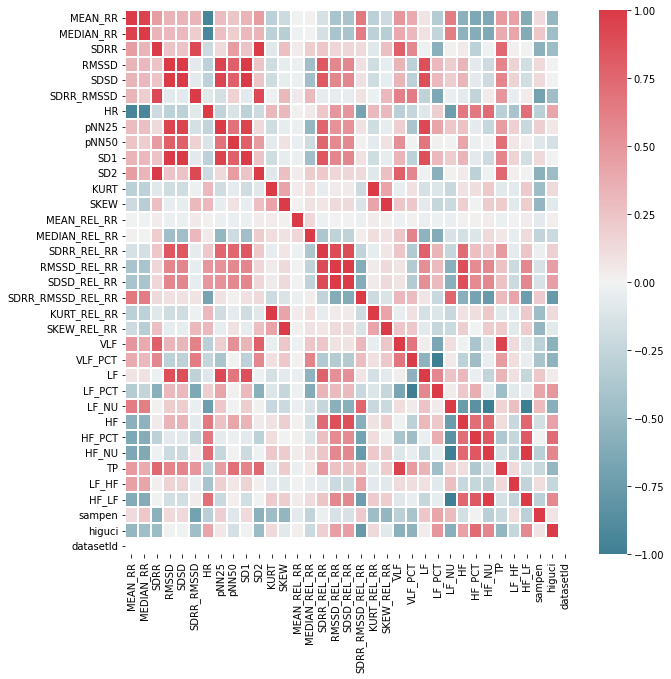

In [ ]:
#Correlation plot
f,ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220,10,as_cmap=True)
heatmap = sns.heatmap(corr,cmap=cmap,center = 0.0,vmax = 1,linewidths = 1,ax=ax)
plt.show()


In [ ]:
x_test=test.iloc[:,0:35]

In [ ]:
y_test = test['condition']

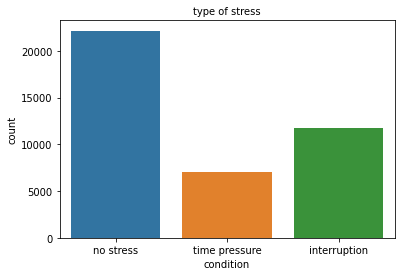

In [ ]:
sns.countplot(x=test["condition"])
plt.title("type of stress",fontsize=10)
plt.show()


In [ ]:
test.isna().sum()

MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
SD1                  0
SD2                  0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
sampen               0
higuci               0
datasetId            0
condition            0
dtype: int64

In [ ]:
test.count()


MEAN_RR              41033
MEDIAN_RR            41033
SDRR                 41033
RMSSD                41033
SDSD                 41033
SDRR_RMSSD           41033
HR                   41033
pNN25                41033
pNN50                41033
SD1                  41033
SD2                  41033
KURT                 41033
SKEW                 41033
MEAN_REL_RR          41033
MEDIAN_REL_RR        41033
SDRR_REL_RR          41033
RMSSD_REL_RR         41033
SDSD_REL_RR          41033
SDRR_RMSSD_REL_RR    41033
KURT_REL_RR          41033
SKEW_REL_RR          41033
VLF                  41033
VLF_PCT              41033
LF                   41033
LF_PCT               41033
LF_NU                41033
HF                   41033
HF_PCT               41033
HF_NU                41033
TP                   41033
LF_HF                41033
HF_LF                41033
sampen               41033
higuci               41033
datasetId            41033
condition            41033
dtype: int64

In [ ]:
test.shape

(41033, 36)

In [ ]:
test["condition"].value_counts()

no stress        22158
interruption     11782
time pressure     7093
Name: condition, dtype: int64

In [ ]:
selected_x_columns = ['HR', 'RMSSD', 'pNN50', 'TP', 'VLF', 'LF', 'HF','LF_HF']


In [ ]:
X = test[selected_x_columns]


In [ ]:
print(X.head(5))


          HR      RMSSD     pNN50           TP          VLF           LF  \
0  84.121868  12.361264  0.000000  1698.605390  1016.073759   615.914573   
1  71.478642  19.298880  0.200000  2358.884694   765.518473  1566.866135   
2  63.874293  21.342715  1.800000  4328.633724  2237.739905  2074.868884   
3  74.330531  11.771814  0.533333  2854.449091  2330.980957   505.886664   
4  82.092049  13.357748  0.666667  5310.027472  4750.624447   524.203971   

          HF       LF_HF  
0  66.617057    9.245599  
1  26.500086   59.126832  
2  16.024935  129.477524  
3  17.581470   28.773854  
4  35.199054   14.892559  


In [ ]:
def fix_stress_labels(rj='',label_column='condition'):
    rj['condition'] = np.where(rj['condition']=='no stress', 0, 1)
    print(rj["condition"].unique())
    return rj


In [ ]:
test= fix_stress_labels(rj=test)
Y = test['condition']


[0 1]


In [ ]:
print(Y.head(5))


0    0
1    1
2    0
3    0
4    1
Name: condition, dtype: int64


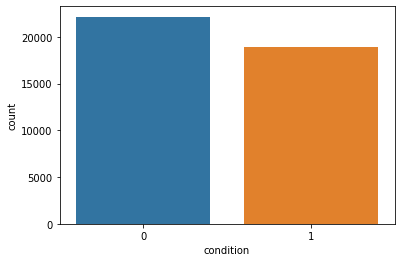

In [ ]:
sns.countplot(x=test["condition"])

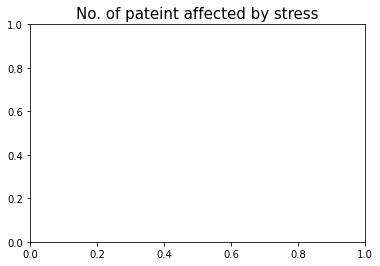

In [ ]:
plt.title("No. of pateint affected by stress",fontsize=15)
plt.show()
test.keys()
sc=StandardScaler()


In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
print(x_test)


[[-1.00428721 -0.87021016 -0.44561099 ...  0.16263636  0.97706593
   0.        ]
 [-0.02666488  0.01738969 -0.65739475 ...  0.7408351   1.07884964
   0.        ]
 [ 0.89749781  0.94380416  0.31321278 ...  0.74016576 -0.60329087
   0.        ]
 ...
 [-1.26560354 -1.35571647  0.32583143 ...  0.06938506  0.51575412
   0.        ]
 [-0.68665853 -0.61412068 -0.62745733 ...  0.61599096  0.83064823
   0.        ]
 [ 0.17026193  0.23440722 -0.62081277 ...  0.38338332 -0.63982396
   0.        ]]


In [ ]:
pca = PCA(n_components=2)
pca.fit(x_test)


PCA(n_components=2)

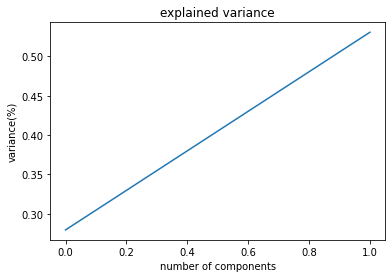

In [ ]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('variance(%)')
plt.title('explained variance')
plt.show()



In [ ]:
a_pca = pca.transform(x_test)
x_test.shape
a_pca.shape
print(x_test)
print(a_pca)


[[-1.00428721 -0.87021016 -0.44561099 ...  0.16263636  0.97706593
   0.        ]
 [-0.02666488  0.01738969 -0.65739475 ...  0.7408351   1.07884964
   0.        ]
 [ 0.89749781  0.94380416  0.31321278 ...  0.74016576 -0.60329087
   0.        ]
 ...
 [-1.26560354 -1.35571647  0.32583143 ...  0.06938506  0.51575412
   0.        ]
 [-0.68665853 -0.61412068 -0.62745733 ...  0.61599096  0.83064823
   0.        ]
 [ 0.17026193  0.23440722 -0.62081277 ...  0.38338332 -0.63982396
   0.        ]]
[[ 3.5717004  -1.58014946]
 [ 0.77765815  2.39026945]
 [-2.27883766  4.00355225]
 ...
 [ 4.63747297  5.72609452]
 [ 2.16362957 -2.34135323]
 [-1.34148549 -2.32987309]]


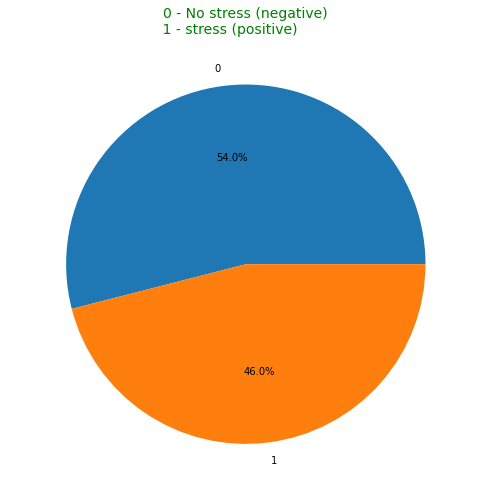

In [ ]:
plt.figure(figsize=(7,7))
Y.value_counts().plot.pie(ylabel=' ', autopct = '%0.1f%%')
plt.title(f'0 - No stress (negative)\n 1 - stress (positive)', size=14, c='green')
plt.tight_layout();
plt.show()

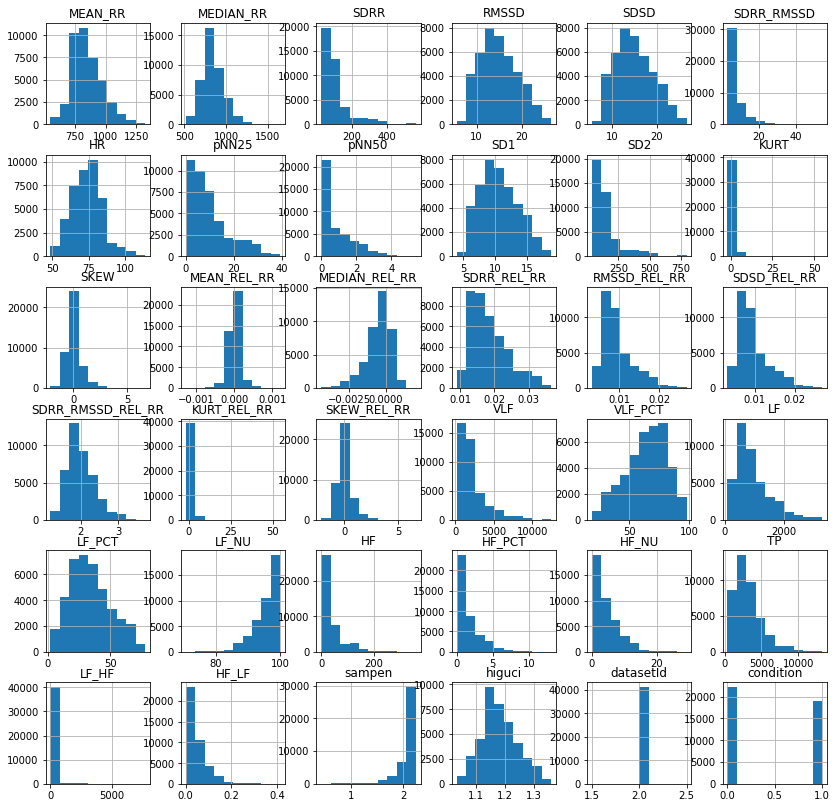

In [ ]:
test.hist(figsize=(14,14))
plt.show()


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=42)


In [ ]:
def plots(testFile, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(testFile[var])
    plt.title('before' + str(t).split('(')[0])
    plt.subplot(122)
    p1 = t.fit_transform(testFile[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after'  + str(t).split(')(')[0])


''

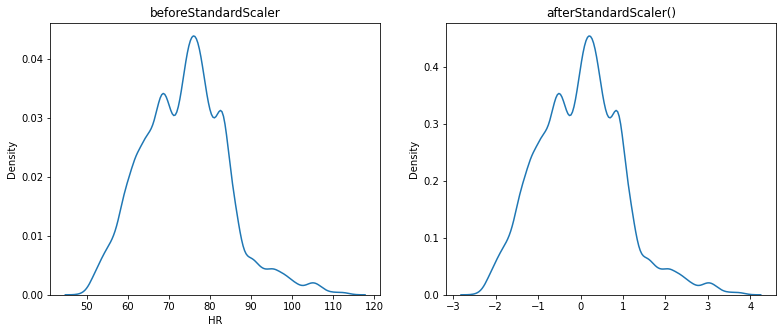

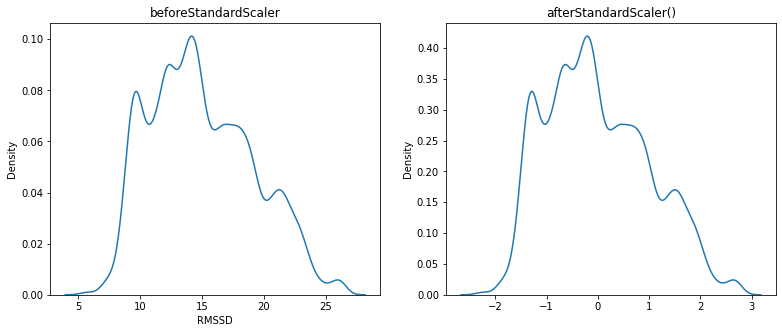

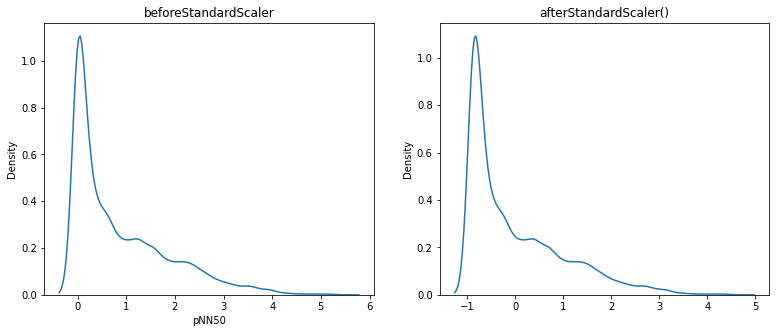

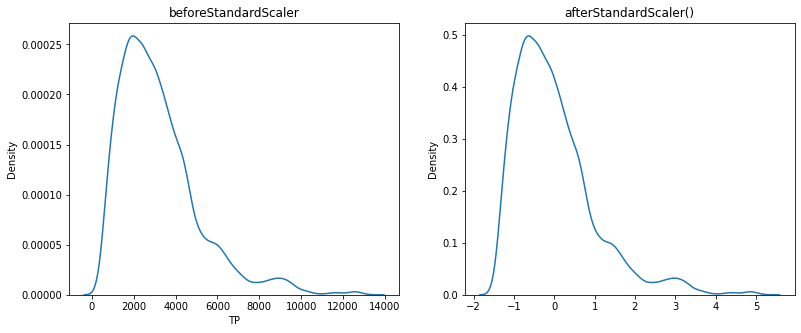

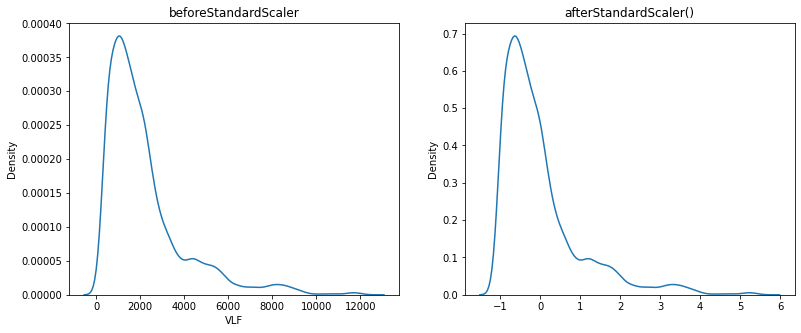

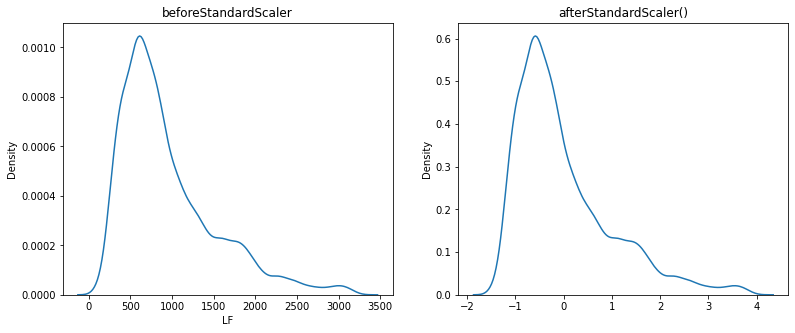

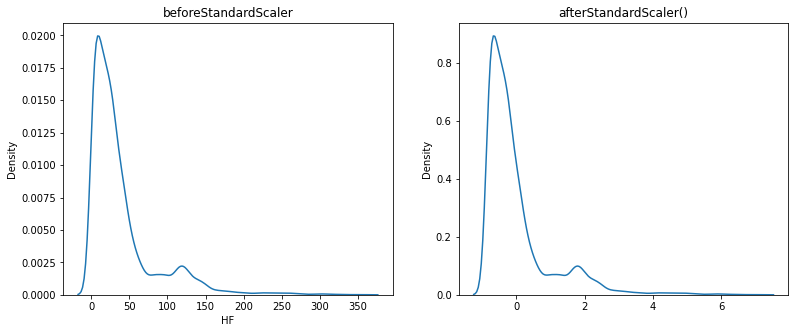

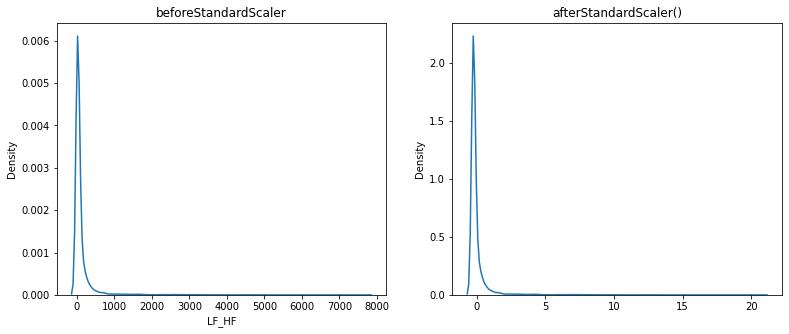

In [ ]:
for col in x_train.columns:
    plots(x_train,col,StandardScaler())

0.8767668562144598
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      6618
           1       0.87      0.86      0.87      5692

    accuracy                           0.88     12310
   macro avg       0.88      0.88      0.88     12310
weighted avg       0.88      0.88      0.88     12310

[[5895  723]
 [ 794 4898]]
0.8767668562144598


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


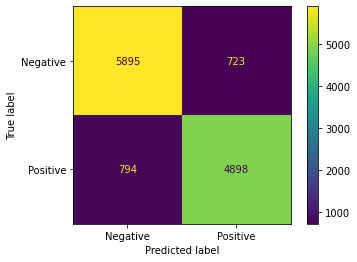

In [ ]:
#knn model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
 # Calculate the accuracy of the model
print(knn.score(x_test, y_test))
y_pred = knn.predict(x_test)
print(metrics.classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
metrics.plot_confusion_matrix(knn, x_test, y_test, display_labels=['Negative', 'Positive'])



0.9247766043866775
[[6240  378]
 [ 548 5144]]
0.9247766043866775


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6618
           1       0.93      0.90      0.92      5692

    accuracy                           0.92     12310
   macro avg       0.93      0.92      0.92     12310
weighted avg       0.92      0.92      0.92     12310



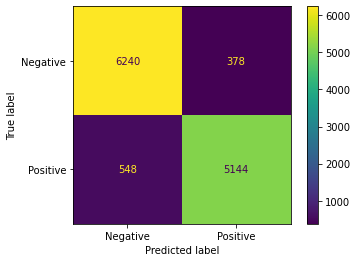

In [ ]:
# svm model
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
svm = SVC(kernel='rbf', random_state=1, gamma=0.5, C=2)
svm.fit(x_train,y_train)
print(svm.score(x_test,y_test))
y_pred = svm.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
metrics.plot_confusion_matrix(svm, x_test, y_test, display_labels=['Negative', 'Positive'])
print(metrics.classification_report(y_test,y_pred))


Accuracy: 0.9815597075548335
[[6498  120]
 [ 107 5585]]
0.9815597075548335
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6618
           1       0.98      0.98      0.98      5692

    accuracy                           0.98     12310
   macro avg       0.98      0.98      0.98     12310
weighted avg       0.98      0.98      0.98     12310



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


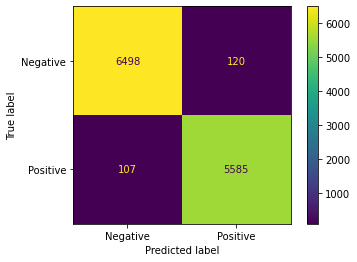

In [ ]:
# decision tree model
DT = DecisionTreeClassifier()
# Train Decision Tree Classifier
DT = DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_pred = DT.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
metrics.plot_confusion_matrix(DT, x_test, y_test, display_labels=['Negative', 'Positive'])
print(metrics.classification_report(y_test,y_pred))


0.9618196588139724
[[6583   35]
 [ 435 5257]]
0.9618196588139724
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      6618
           1       0.99      0.92      0.96      5692

    accuracy                           0.96     12310
   macro avg       0.97      0.96      0.96     12310
weighted avg       0.96      0.96      0.96     12310



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


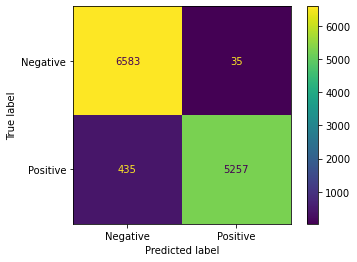

In [ ]:

#random forest model
RF = RandomForestClassifier(n_estimators = 2, random_state = 0)
RF.fit(x_train,y_train)
print(RF.score(x_test,y_test))
y_pred = RF.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
metrics.plot_confusion_matrix(RF, x_test, y_test, display_labels=['Negative', 'Positive'])
print(metrics.classification_report(y_test,y_pred))


